<a href="https://colab.research.google.com/github/mansi29912/Fake_News_Detection/blob/main/Fake_News_Detection_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news Detection

### Importing Modules

In [63]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

### Reading two  data files
### Download this dataset from
https://www.kaggle.com/code/therealsampat/fake-news-detection/data

In [64]:
data_true = pd.read_csv("/content/True.csv", nrows=7400, error_bad_lines=False, skiprows=[1618])

data_fake = pd.read_csv("/content/Fake.csv", nrows=7400, error_bad_lines=False, skiprows=[1202])

<ipython-input-64-bd55e7586cf7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_true = pd.read_csv("/content/True.csv", nrows=7400, error_bad_lines=False, skiprows=[1618])
<ipython-input-64-bd55e7586cf7>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_fake = pd.read_csv("/content/Fake.csv", nrows=7400, error_bad_lines=False, skiprows=[1202])


#### Printing top 5 values from both Dataset

In [65]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [66]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Checking size of Datasets

In [67]:
data_true.shape, data_fake.shape

((1617, 4), (1201, 4))

### Adding column name "class" in both datasets

In [68]:
data_true["class"]=1
data_fake["class"]=0

###  Taking last 10 values for manual testing from both Datasets

In [69]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    if i in data_true.index:
        data_true.drop([i], axis=0, inplace=True)
    else:
        print(f"Index {i} not found in data_true DataFrame")

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416, 21406, -1):
    if i in data_fake.index:
        data_fake.drop([i], axis=0, inplace=True)
    else:
        print(f"Index {i} not found in data_fake DataFrame")


Index 21416 not found in data_true DataFrame
Index 21415 not found in data_true DataFrame
Index 21414 not found in data_true DataFrame
Index 21413 not found in data_true DataFrame
Index 21412 not found in data_true DataFrame
Index 21411 not found in data_true DataFrame
Index 21410 not found in data_true DataFrame
Index 21409 not found in data_true DataFrame
Index 21408 not found in data_true DataFrame
Index 21407 not found in data_true DataFrame
Index 21416 not found in data_fake DataFrame
Index 21415 not found in data_fake DataFrame
Index 21414 not found in data_fake DataFrame
Index 21413 not found in data_fake DataFrame
Index 21412 not found in data_fake DataFrame
Index 21411 not found in data_fake DataFrame
Index 21410 not found in data_fake DataFrame
Index 21409 not found in data_fake DataFrame
Index 21408 not found in data_fake DataFrame
Index 21407 not found in data_fake DataFrame


### merging these two datasets in single dataframe

In [70]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

### Merging main two datasets

In [71]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Performing some basic data visualizations

subject
News            1201
politicsNews    1617
Name: text, dtype: int64


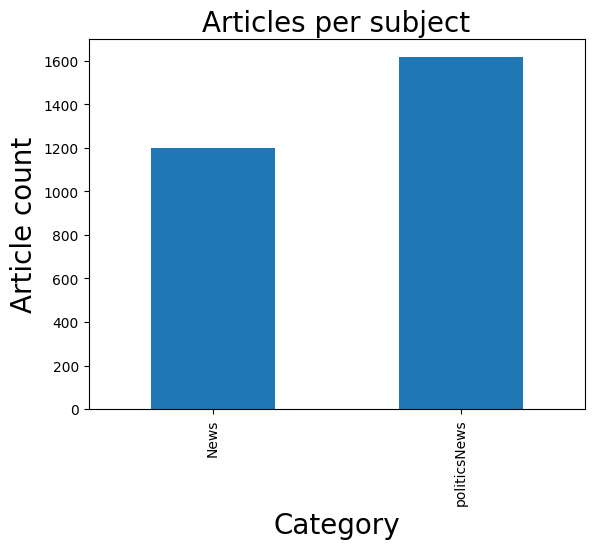

In [72]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    1201
1    1617
Name: text, dtype: int64
0 = Fake news
1 = True news


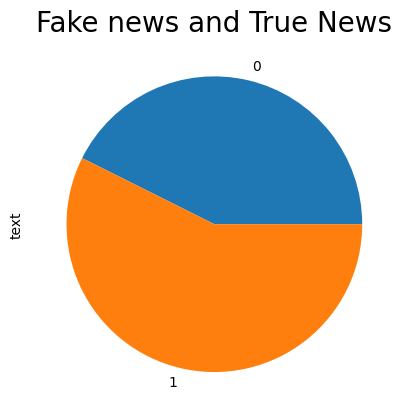

In [73]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

### Removing 3 columns from dataset

In [74]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Shuffling the dataset for better prediction

In [75]:
data=data.sample(frac=1)
data.head(10)

,text,class
134,"At least 27 people, including children, were m...",0
61,A Breitbart News editor tried to use a song Ri...,0
477,"In any other administration, this would be abs...",0
690,"Richard Painter, former ethics lawyer to Presi...",0
825,The co-chair of Trump s voter fraud commission...,0
924,Donald Trump s first trip overseas was an abso...,0
69,Donald Trump isn t polling well in the readers...,0
109,(Reuters) - The U.S. Congress is expected to v...,1
558,WASHINGTON (Reuters) - The House of Representa...,1
517,"The Congressional Black Caucus, like most Demo...",0


### Checking for null values in dataset

In [76]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Creating data filtering function to remove unwanted data from text

In [77]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

### Filtering data of our text column using above function

In [78]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
134,at least people including children were mur...,0
61,a breitbart news editor tried to use a song ri...,0
477,in any other administration this would be abs...,0
690,richard painter former ethics lawyer to presi...,0
825,the co chair of trump s voter fraud commission...,0
924,donald trump s first trip overseas was an abso...,0
69,donald trump isn t polling well in the readers...,0
109,reuters the u s congress is expected to v...,1
558,washington reuters the house of representa...,1
517,the congressional black caucus like most demo...,0


### Creating Dependant and independant variables

In [79]:
x=data["text"]
y=data["class"]

### Spliting dataset for training and testing purpose

In [80]:
x_train, x_test, y_train, y_test = ttp(x, y, test_size=0.2, random_state=0)






### Vectorizing the text
#### The sklearn. feature_extraction module is used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vector = TfidfVectorizer() # creating object
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix.
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

## Classifaction using various classifers

### Logictic Regression
#### Calculating probability of event occurence

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set

LogisticRegression()

In [85]:
LR.score(xv_test,y_test).round(2) # method computes the accuracy score

0.99

In [86]:
pred_LR= LR.predict(xv_test) # Predict using the linear model

In [87]:
print(classification_report(y_test,pred_LR)) #creating classification report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       241
           1       0.99      0.99      0.99       323

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



### Creating confusion matrix
#### determine the performance of the classification models for a given set of test data.

[[238   3]
 [  2 321]]


<Axes: >

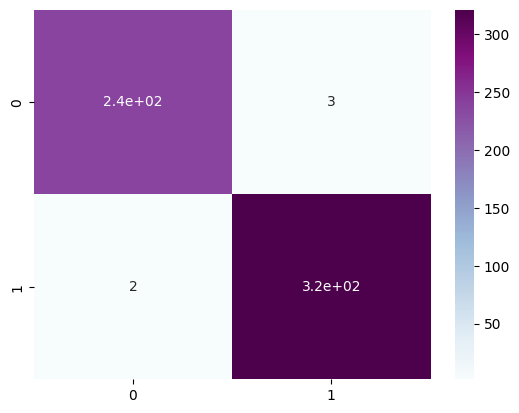

In [88]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)


### Gradient Boosting Classifier

#### It is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [91]:
GBC.score(xv_test,y_test)

0.99822695035461

In [92]:
pred_GBC = GBC.predict(xv_test)

In [93]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       323

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



[[240   1]
 [  0 323]]


<Axes: >

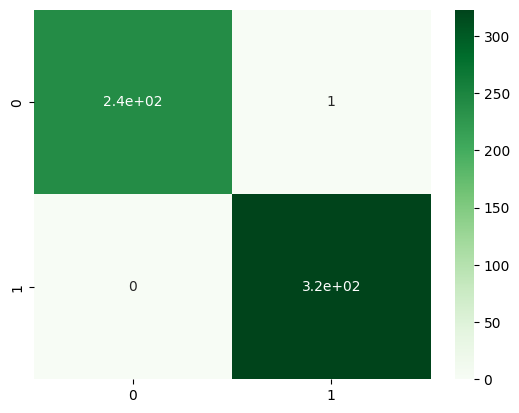

In [94]:
cm= confusion_matrix(y_test,pred_GBC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)

### Random Forest Classifier

#### Supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [97]:
RFC.score(xv_test,y_test)

1.0

In [98]:
pred_RFC = RFC.predict(xv_test)

In [99]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       323

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



[[241   0]
 [  0 323]]


<Axes: >

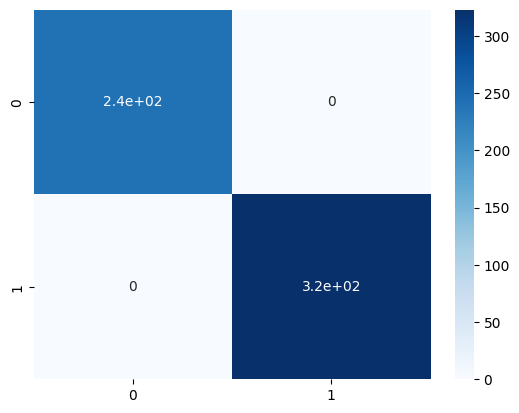

In [100]:
cm= confusion_matrix(y_test,pred_RFC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

## Manual Testing

In [101]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)

    pred_RFC = RFC.predict(new_xv_test)

    return print(" RFC Prediction: {}".format(output_lable(pred_RFC[0])))


# ENSEMBLE LEARNING

In [102]:
from sklearn.ensemble import VotingClassifier

# Define the estimators for the ensemble
estimators = [('lr', LR), ('gbc', GBC), ('rfc', RFC)]

In [103]:
# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [104]:
# Fit the ensemble model on the training data
voting_clf.fit(xv_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gbc',
                              GradientBoostingClassifier(random_state=0)),
                             ('rfc', RandomForestClassifier(random_state=0))])

In [105]:
# Evaluate the ensemble model
voting_clf.score(xv_test, y_test)

1.0

In [106]:
# Make predictions using the ensemble model
pred_voting = voting_clf.predict(xv_test)

In [107]:
# Print classification report for the ensemble model
print(classification_report(y_test, pred_voting))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       323

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



In [108]:

# Confusion matrix for the ensemble model
cm_voting = confusion_matrix(y_test, pred_voting)
print(cm_voting)

[[241   0]
 [  0 323]]


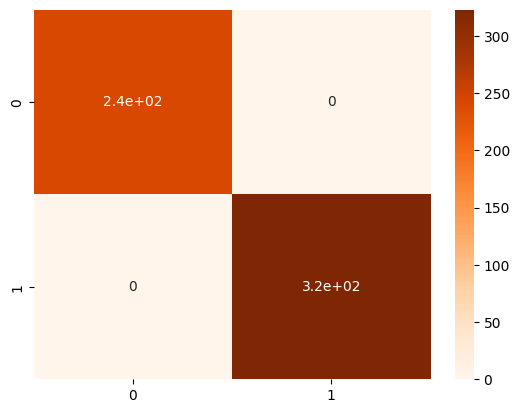

In [109]:

# Visualize confusion matrix
sns.heatmap(cm_voting, cmap="Oranges", annot=True)
plt.show()

In [110]:
# Manual testing using the ensemble model
def manual_testing_ensemble(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_voting = voting_clf.predict(new_xv_test)

    return print("\n\nEnsemble Prediction: {}".format(output_lable(pred_voting[0])))



In [111]:
# Test the function with user input
news = str(input("Enter the news text for manual testing: "))
manual_testing_ensemble(news)

Enter the news text for manual testing: The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 


Ensemble Prediction: TRUE News


In [112]:
news = str(input("Enter the news text for manual testing: "))
manual_testing_ensemble(news)

Enter the news text for manual testing: The media has been talking all day about Trump and the Republican Party s scam of a tax bill; as well as the sheer obsequiousness of Trump s cabinet, and then members of Congress, after their tax scam was all but passed. But the media isn t quite saying what Trump wants. They ve been doing analysis and discussion all day long rather than praising it for the grand achievement Trump believes it is. The GOP has increasingly sounded exactly like Trump when it comes to media coverage, and coverage of the tax scam is no different. Coverage of Trump in general hasn t changed.Today, Lindsey Graham went after the media for portraying Trump as a  kook,  and unfit for office (they wouldn t be doing their job if they weren t telling the truth, though). Graham said: You know what concerns me about the American press is this endless, endless attempt to label the guy as some kind of kook; not fit to be president. Jake Tapper notes that he himself has never labe